In [10]:
import sys
import os

# Get the absolute path of the root directory (one level up from "notebooks")
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add it to sys.path
sys.path.append(root_dir)

In [11]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.cluster import AgglomerativeClustering
from src.data.data_transformations import img_to_tabular

In [19]:
# compressed_image = compressed_image_data.reshape(img_np.shape)  # Reshape back to original dimensions

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.cluster import AgglomerativeClustering
img = Image.open("../data/raw/img.jpg")
img_np = np.array(img)

In [2]:
downsample_factor = 8
downsampled_img_pil = img.resize((img.width // downsample_factor, img.height // downsample_factor))
downsampled_img_np = np.array(downsampled_img_pil)
downsampled_img_np_flat = downsampled_img_np.reshape((-1,3))

In [3]:
img_np.shape

(720, 1280, 3)

In [4]:
target_pixels = 10000

In [5]:
original_pixels = img.width * img.height
original_pixels

921600

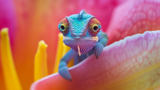

In [6]:
downsampled_img_pil

In [7]:
isinstance(downsampled_img_pil, Image.Image)

True

In [14]:
 # Calculate the downsample factor based on the ratio of pixels
downsample_factor = int(np.sqrt(original_pixels / target_pixels))
downsample_factor
#     # Ensure the factor is at least 1 (to avoid upsampling)
# downsample_factor = max(downsample_factor, 1)
    
#     # Resize the image using the calculated downsample factor
small_image_pil = img.resize(
        (img.width // downsample_factor, img.height // downsample_factor)
)

img, img_np, img_flat, img_tab = img_to_tabular(small_image_pil)

#     # Flatten the image into a tabular format (N, 3)
# flattened_image = np.array(small_image_pil).reshape((-1, 3))
    

In [18]:
img_flat.shape

(11360, 3)

In [19]:
model = AgglomerativeClustering(n_clusters=2)
model.fit(img_flat)

AgglomerativeClustering()

In [20]:
labels = model.labels_

df = pd.DataFrame(img_flat); df = pd.concat([df, pd.DataFrame(labels)], axis = 1)
df.columns = ['r', 'g', 'b', 'label']

cluster_centers = np.array(df.groupby(by='label')[['r', 'g', 'b']].mean())
cluster_centers

array([[188.67223177,  97.7910631 ,  71.24220476],
       [177.35843186, 136.69415059, 176.37616677]])

In [28]:
color_compressed_img_flat = cluster_centers[labels]
color_compressed_img_np = color_compressed_img_flat.reshape(img_np.shape)

In [30]:
color_compressed_img_np.shape == img_np.shape

True

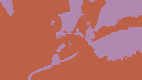

In [34]:
Image.fromarray(color_compressed_img_np.astype('uint8'))

In [2]:
img_flat_large = np.array(img).reshape((-1,3))
img_flat_large

array([[191,  63, 165],
       [191,  63, 165],
       [191,  63, 165],
       ...,
       [190, 144, 119],
       [190, 144, 119],
       [190, 144, 119]], dtype=uint8)

In [3]:
img_np = np.array(img)
img_np.shape

(720, 1280, 3)

In [4]:
img_tab = pd.DataFrame(img_flat_large, columns=['r', 'g', 'b'])  
img_sample_flat = img_tab.sample(n=10000, random_state=1).sort_index().to_numpy()

model = AgglomerativeClustering(n_clusters=10)
model.fit(img_sample_flat)


AgglomerativeClustering(n_clusters=10)

In [5]:
labels = model.labels_

df = pd.DataFrame(img_sample_flat); df = pd.concat([df, pd.DataFrame(labels)], axis = 1)
df.columns = ['r', 'g', 'b', 'label']

cluster_centers = np.array(df.groupby(by='label')[['r', 'g', 'b']].mean())
cluster_centers

array([[197.9497012 , 125.40338645, 159.64193227],
       [211.19376098,  95.42442882,  82.81107206],
       [161.94257065, 119.11759344,  94.96900638],
       [ 86.44572368, 139.16776316, 175.14473684],
       [ 85.85276074,  52.21472393,  82.39263804],
       [151.72513966,  65.32178771,  59.59106145],
       [200.85714286, 177.97932331, 216.51503759],
       [202.3691358 ,  89.73703704,  14.77283951],
       [200.98208469,  43.90879479, 122.44788274],
       [224.82853717, 158.89688249,  11.29496403]])

In [6]:
labels

array([8, 0, 1, ..., 5, 2, 2], dtype=int64)

In [7]:
model.predict(img_sample_flat)

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

In [35]:
df.shape[0]

10000

In [31]:
img_flat_large.shape

(921600, 3)

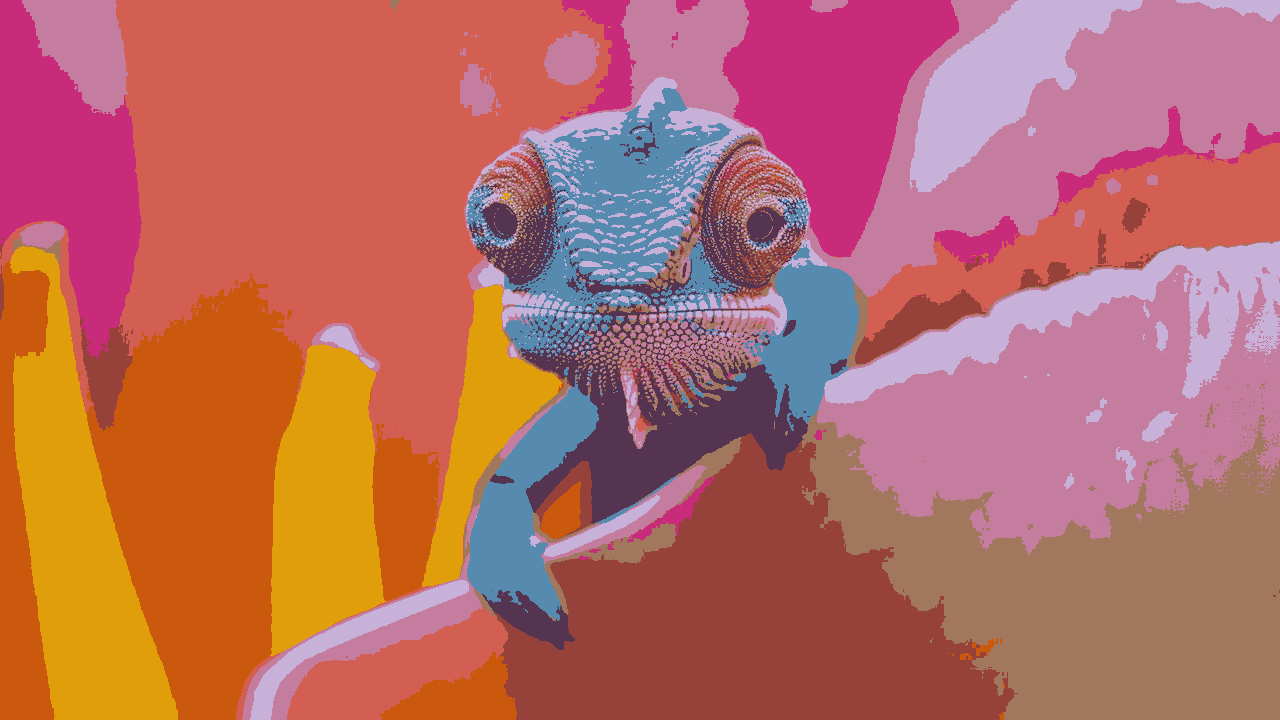

In [32]:
full_labels = pairwise_distances_argmin(img_flat_large, cluster_centers, metric='euclidean')
compressed_image_data = cluster_centers[full_labels]

image_data_np = compressed_image_data.reshape(img_np.shape)

Image.fromarray(image_data_np.astype('uint8'))

In [26]:
downsample_factor = 8
small_image_pil = img.resize((img.width // downsample_factor, img.height // downsample_factor))

small_image_np = np.array(small_image_pil)
small_image_np

array([[[191,  63, 165],
        [193,  65, 167],
        [194,  68, 170],
        ...,
        [203, 165, 220],
        [204, 171, 224],
        [206, 170, 224]],

       [[190,  61, 159],
        [192,  63, 163],
        [194,  65, 166],
        ...,
        [204, 145, 210],
        [204, 155, 217],
        [204, 150, 212]],

       [[192,  58, 155],
        [192,  60, 160],
        [194,  64, 165],
        ...,
        [204, 121, 195],
        [206, 136, 205],
        [204, 127, 198]],

       ...,

       [[197,  88,   2],
        [197,  88,   1],
        [197,  89,   0],
        ...,
        [174, 143,  81],
        [177, 144,  89],
        [179, 141,  88]],

       [[196,  87,   1],
        [197,  88,   2],
        [197,  88,   0],
        ...,
        [178, 148,  97],
        [180, 147, 102],
        [186, 147, 108]],

       [[196,  87,   1],
        [197,  88,   2],
        [197,  88,   0],
        ...,
        [182, 149, 105],
        [186, 147, 111],
        [189, 145, 117]]

In [8]:
small_image_pil.size

(160, 90)

In [9]:
img_flat = np.array(small_image_pil).reshape(-1, 3)

In [10]:
img_flat.shape

(14400, 3)

In [11]:
model = AgglomerativeClustering(n_clusters=2)
model.fit(img_flat)

AgglomerativeClustering()

In [12]:
labels = model.labels_

In [13]:
labels

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [15]:
cluster_centers = np.zeros((2, 3), dtype=np.uint8)

In [16]:
cluster_centers

array([[0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [27]:
df = pd.DataFrame(img_flat); df = pd.concat([df, pd.DataFrame(labels)], axis = 1)
df.columns = ['r', 'g', 'b', 'label']

In [31]:
df

,r,g,b,label
0,191,63,165,0
1,193,65,167,0
2,194,68,170,0
3,195,71,176,0
4,197,74,183,0
...,...,...,...,...
14395,174,145,88,0
14396,176,145,95,0
14397,182,149,105,0
14398,186,147,111,0


In [49]:
cluster_centers = np.array(df.groupby(by='label')[['r', 'g', 'b']].mean())
cluster_centers

array([[188.11064167,  97.09048499,  79.30507878],
       [175.62619283, 152.57650543, 182.06252057]])

In [43]:
img_flat_large

array([[191,  63, 165],
       [191,  63, 165],
       [191,  63, 165],
       ...,
       [190, 144, 119],
       [190, 144, 119],
       [190, 144, 119]], dtype=uint8)

In [44]:
from sklearn.metrics import pairwise_distances_argmin

In [50]:
full_labels = pairwise_distances_argmin(img_flat, cluster_centers)


In [62]:
compressed_image_data = cluster_centers[labels]

In [64]:
compressed_image_data

array([[188.11064167,  97.09048499,  79.30507878],
       [188.11064167,  97.09048499,  79.30507878],
       [188.11064167,  97.09048499,  79.30507878],
       ...,
       [188.11064167,  97.09048499,  79.30507878],
       [188.11064167,  97.09048499,  79.30507878],
       [175.62619283, 152.57650543, 182.06252057]])

In [127]:
small_image_np.shape

(90, 160, 3)

In [129]:
compressed_image = compressed_image_data.reshape(small_image_np.shape)  # Reshape back to original dimensions

ValueError: cannot reshape array of size 2764800 into shape (90,160,3)

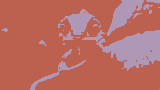

In [70]:
Image.fromarray(compressed_image.astype('uint8'))